In [1]:
import os
import pandas as pd

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/'

#### Extracting Visualization Plots - Action Count and Time Spent by Completed Step

Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C002B_ActionSteps.ipynb


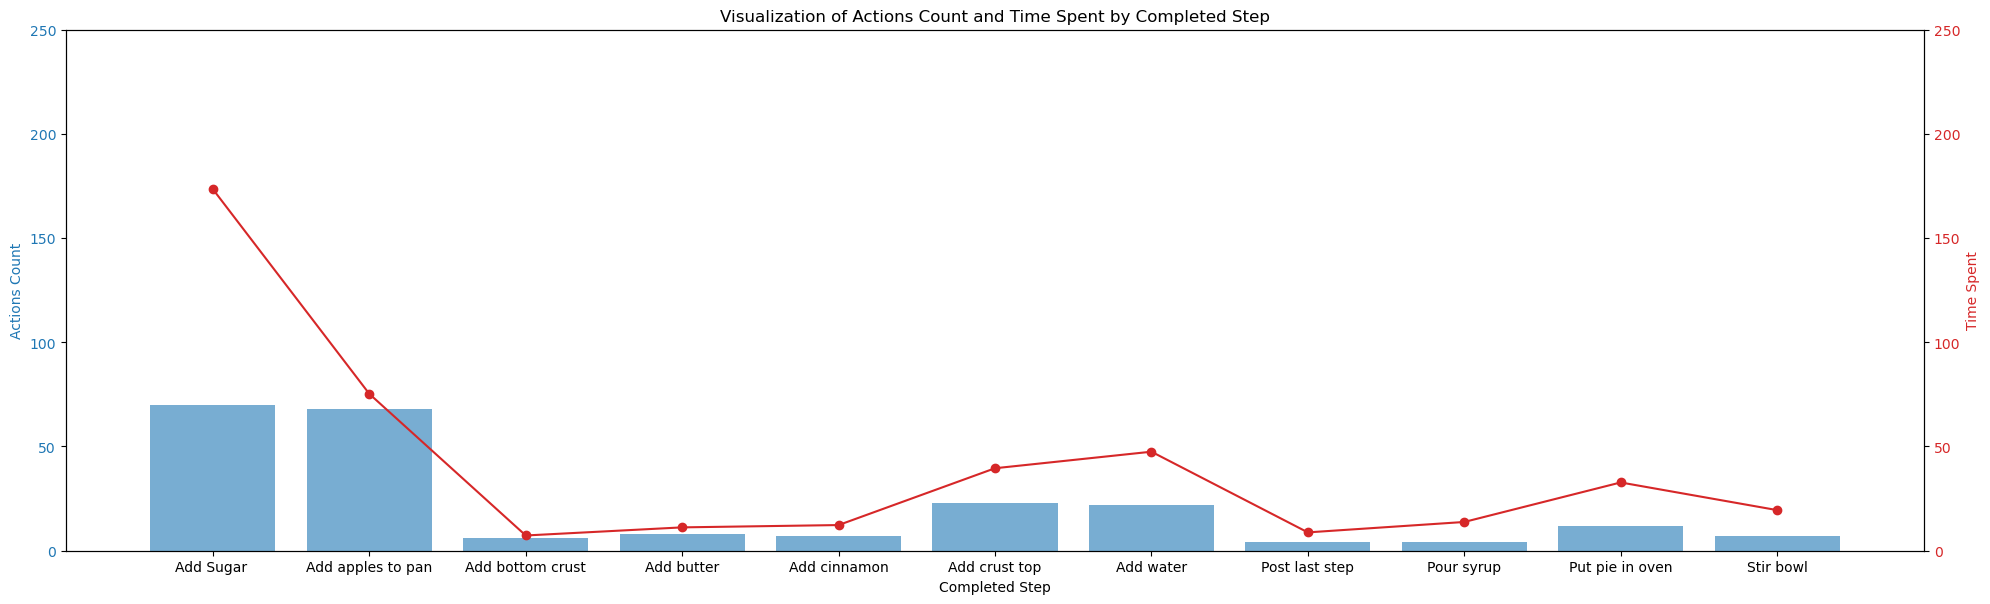

Extracted df_grouped from C002B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C004B_ActionSteps.ipynb


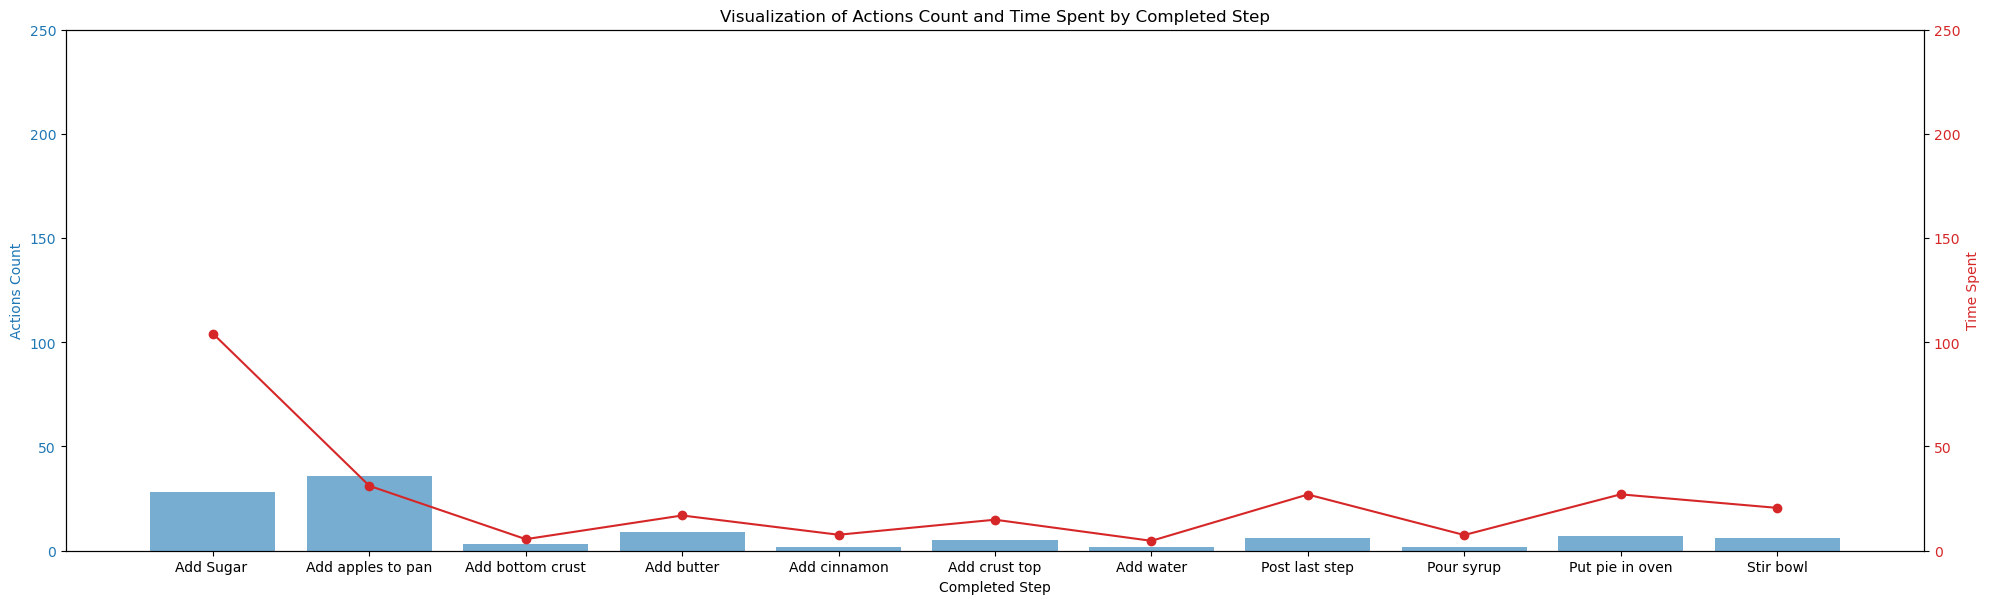

Extracted df_grouped from C004B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C005C_ActionSteps.ipynb


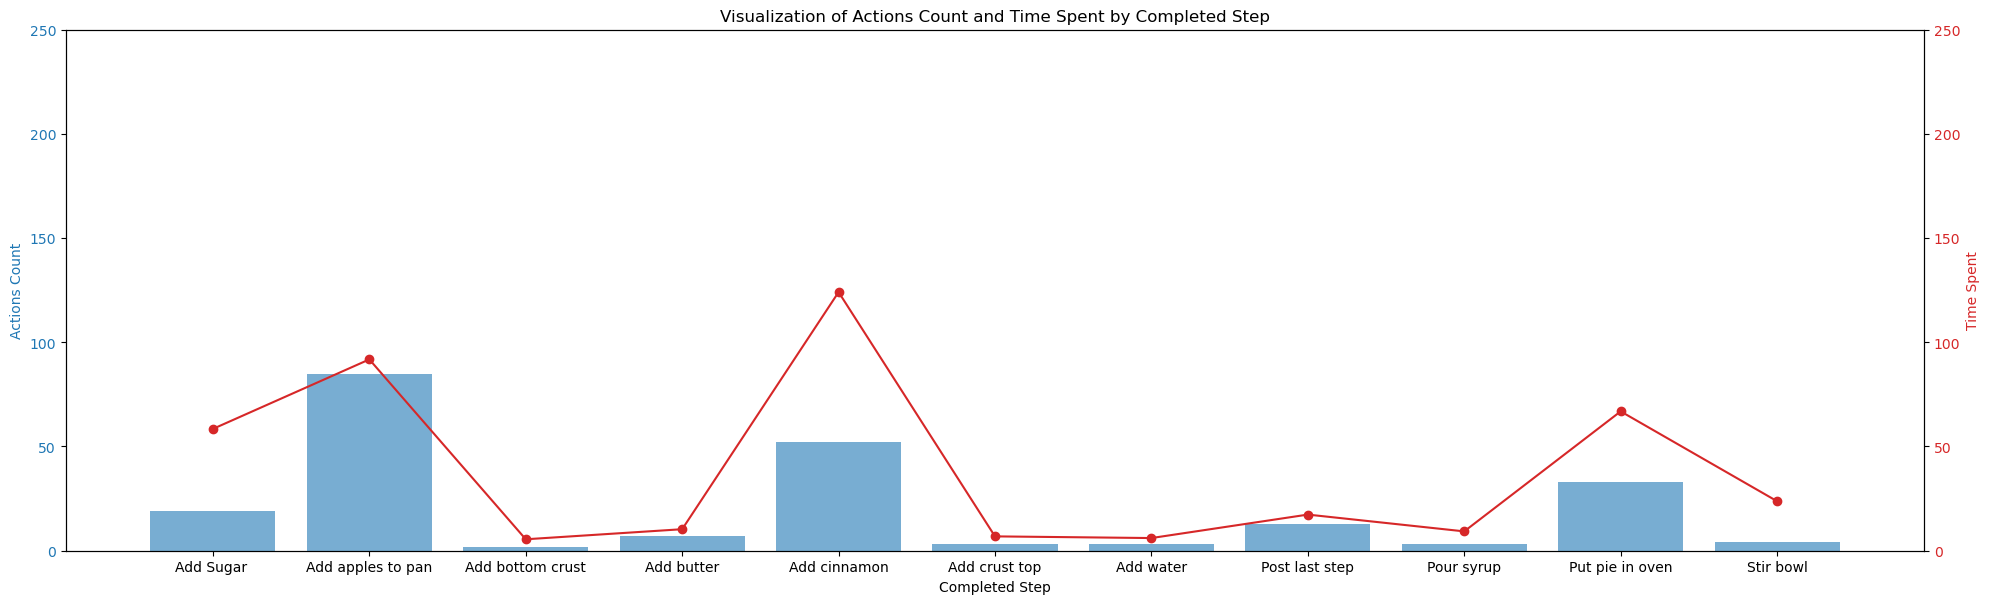

Extracted df_grouped from C005C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C010B_ActionSteps.ipynb


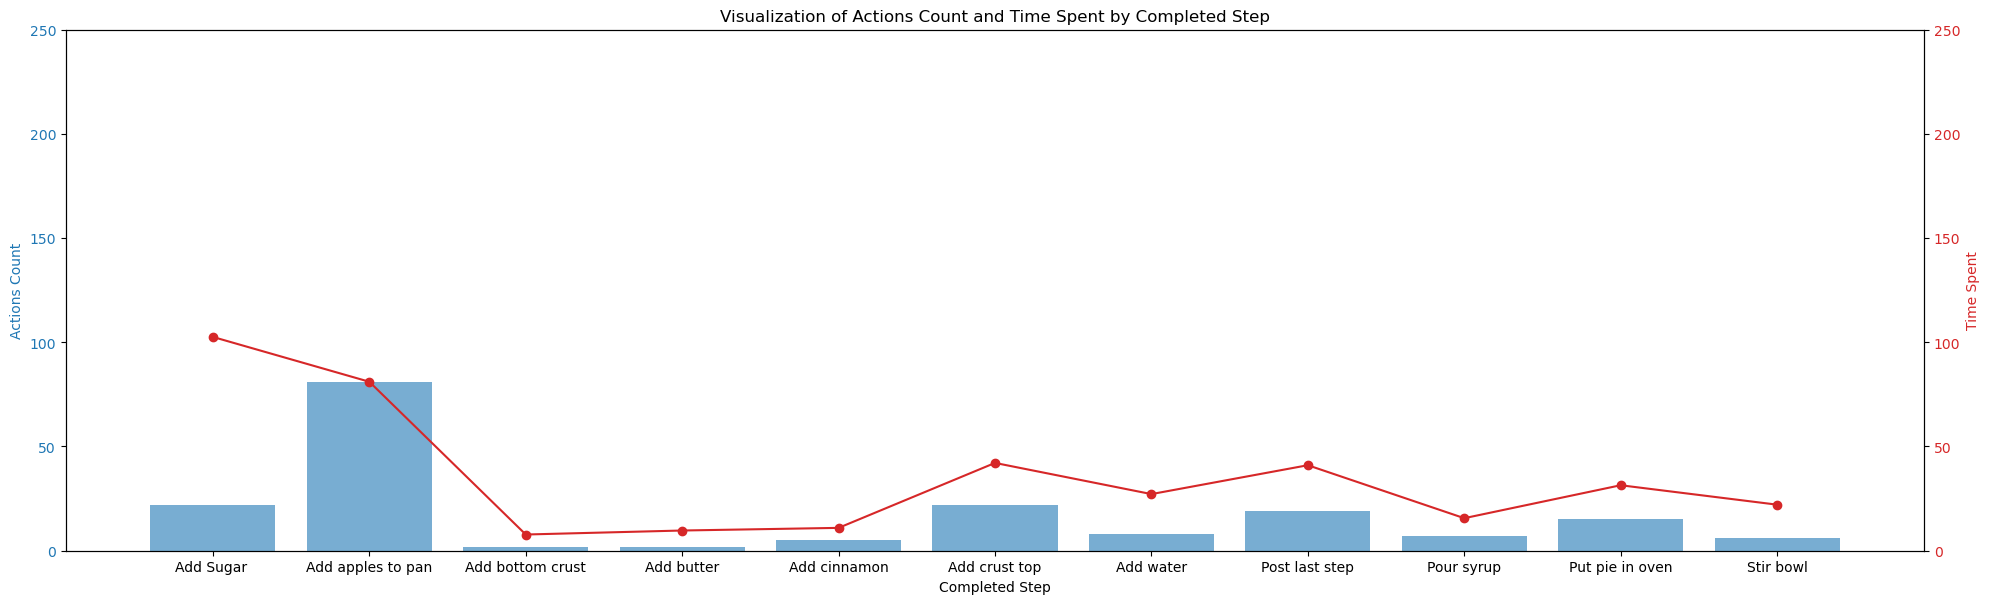

Extracted df_grouped from C010B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C011C_ActionSteps.ipynb


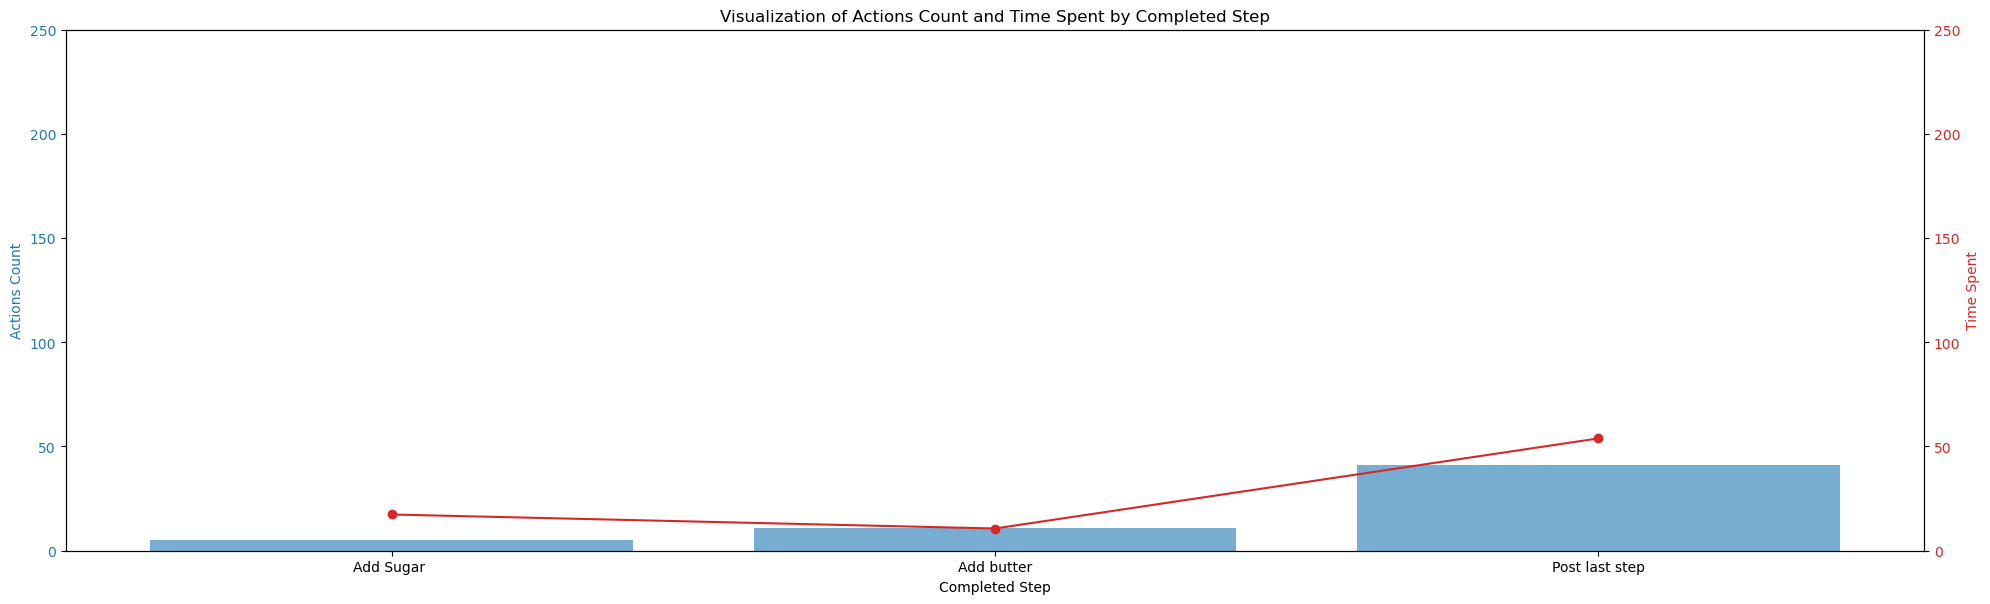

Extracted df_grouped from C011C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C014B_ActionSteps.ipynb


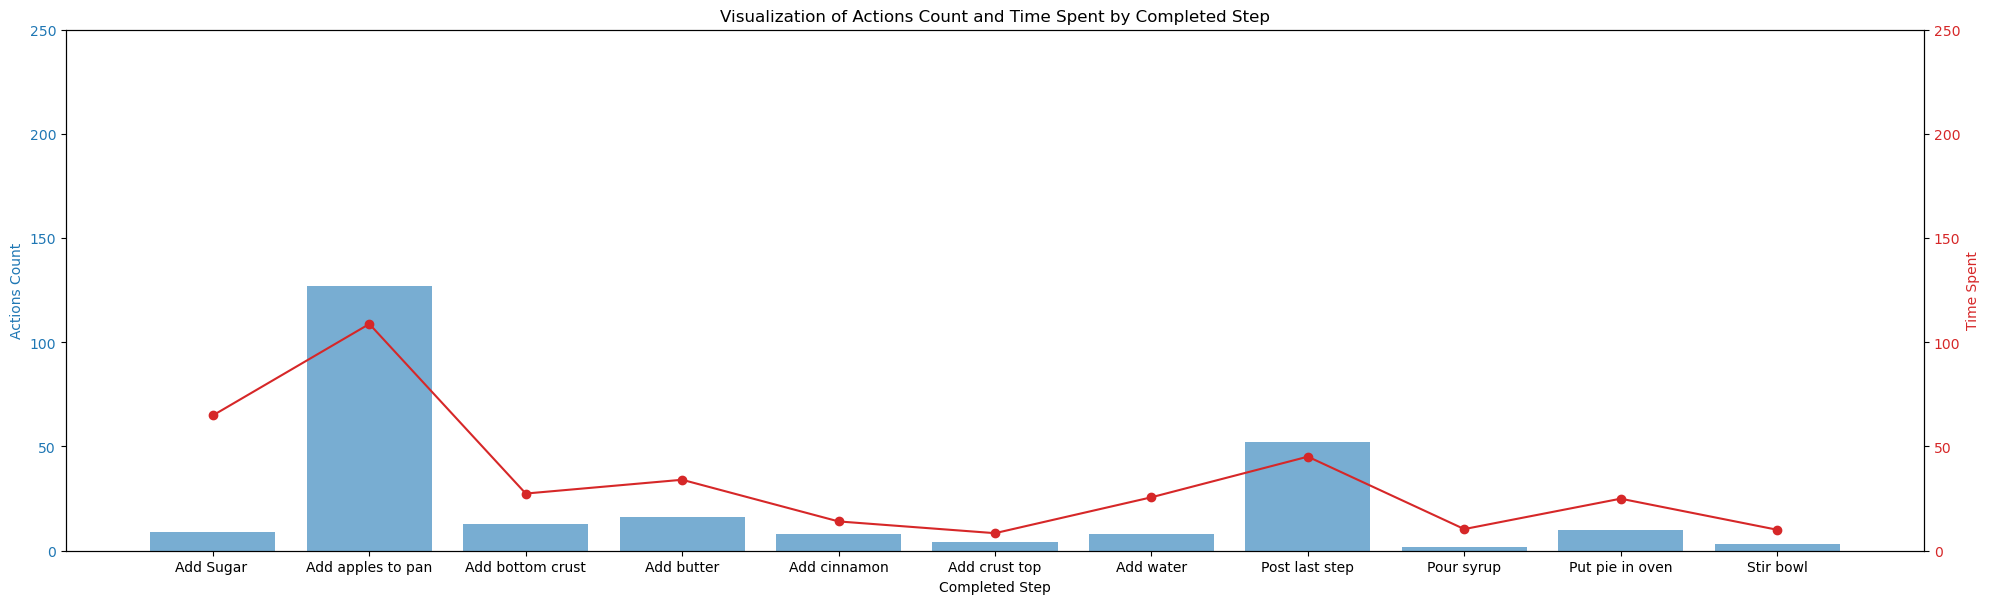

Extracted df_grouped from C014B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C015C_ActionSteps.ipynb


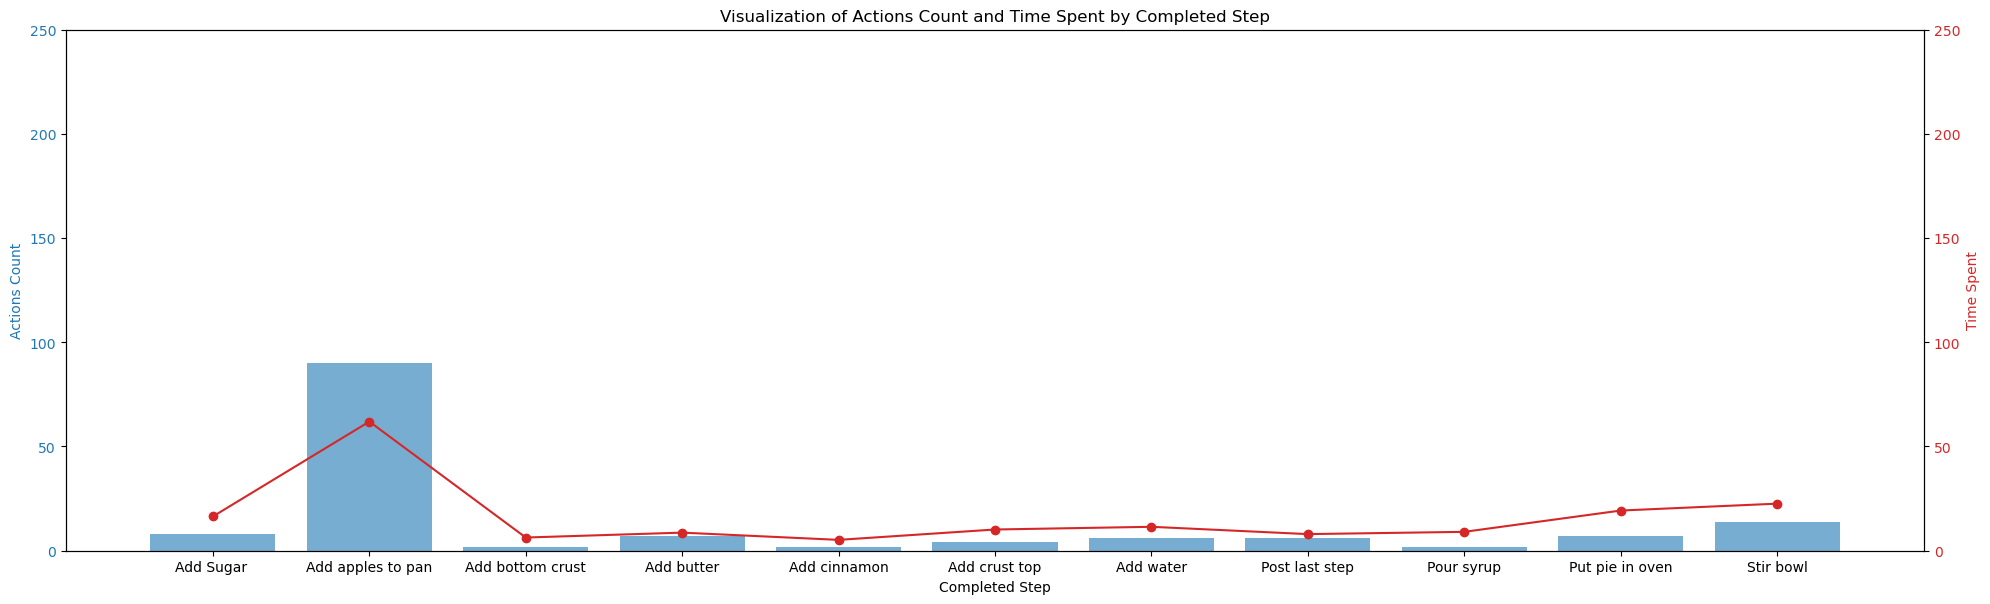

Extracted df_grouped from C015C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C018B_ActionSteps.ipynb


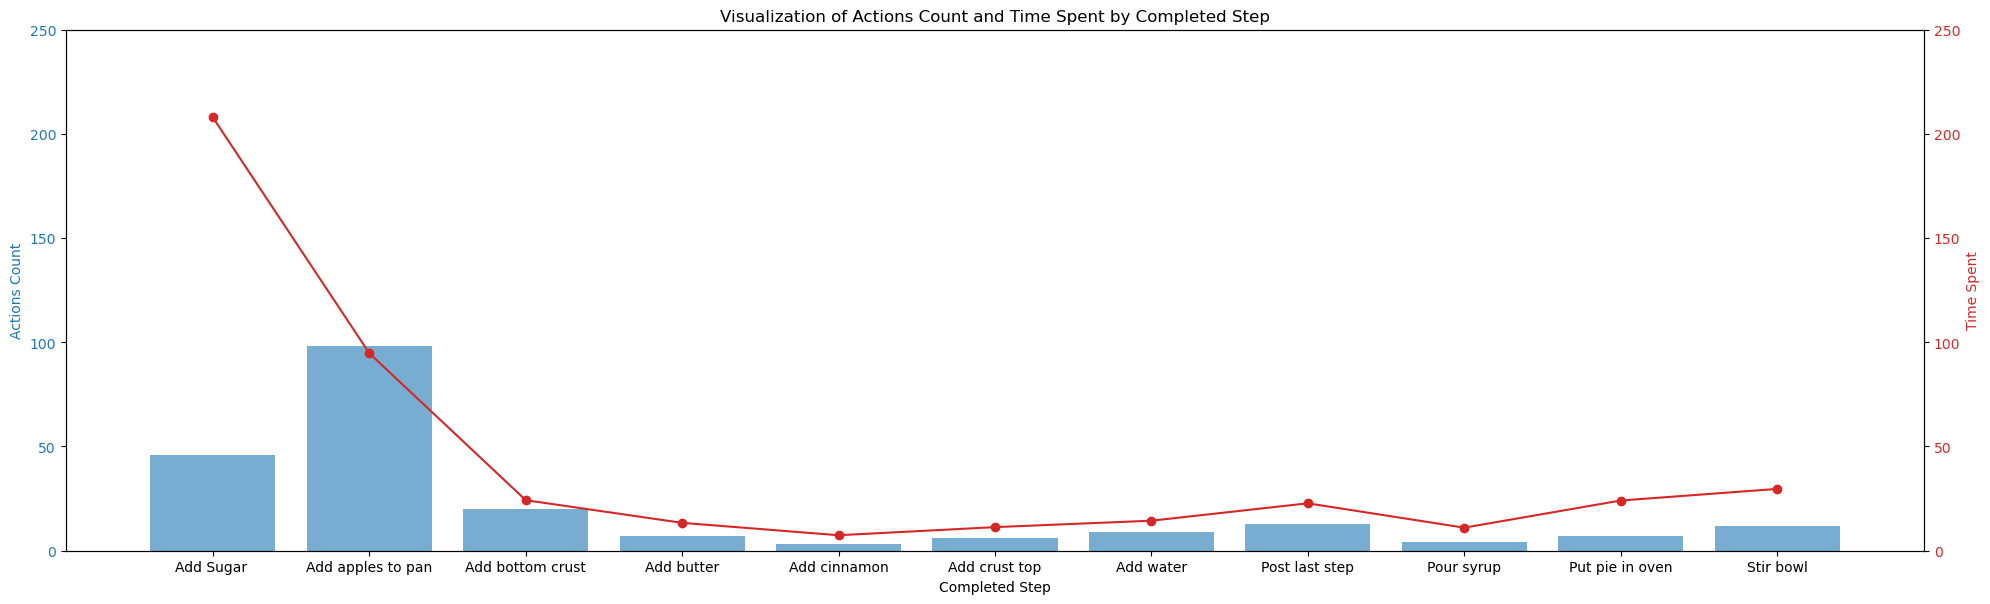

Extracted df_grouped from C018B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C019C_ActionSteps.ipynb


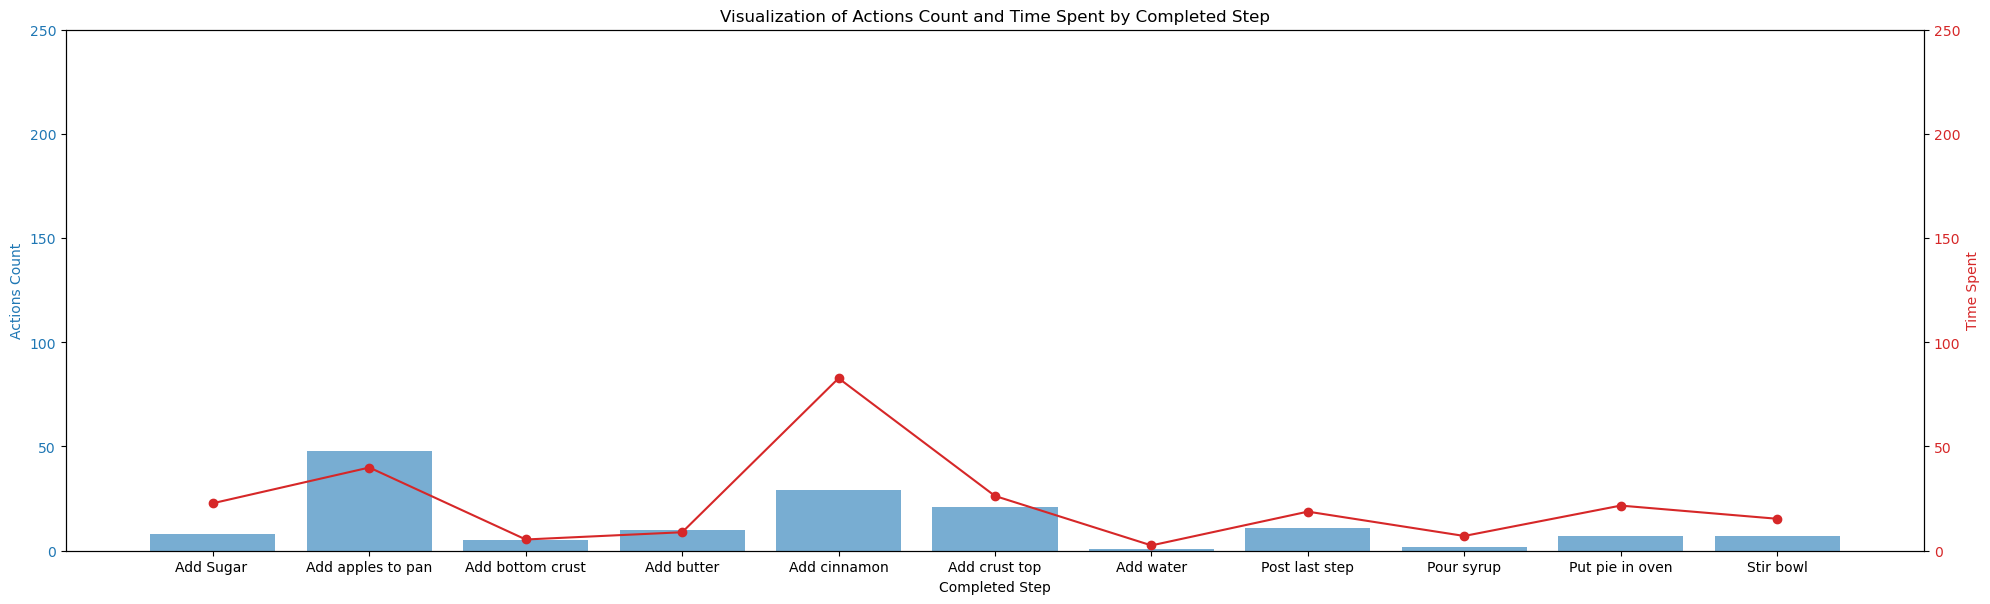

Extracted df_grouped from C019C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C023C_ActionSteps.ipynb


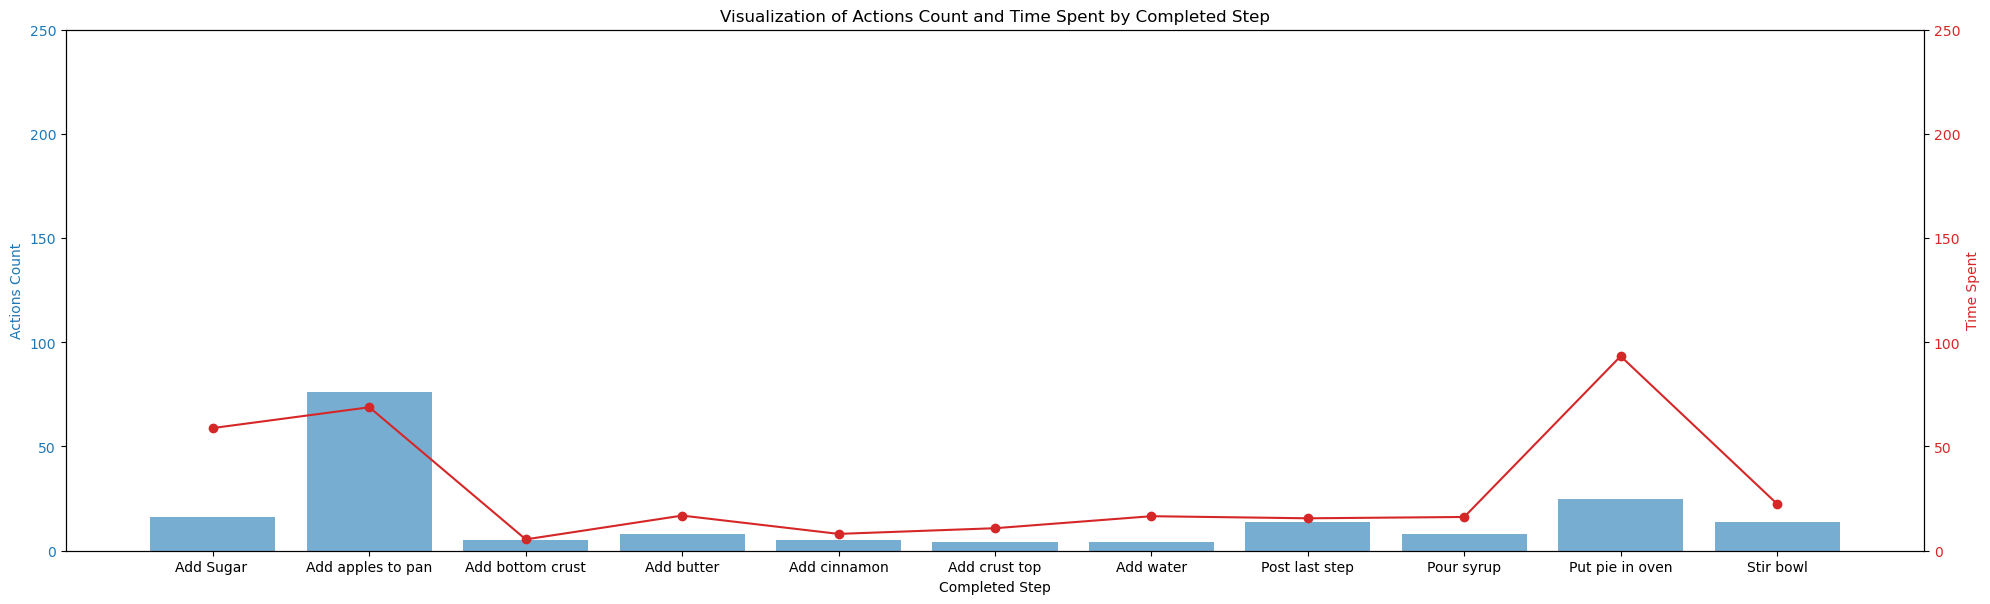

Extracted df_grouped from C023C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C026B_ActionSteps.ipynb


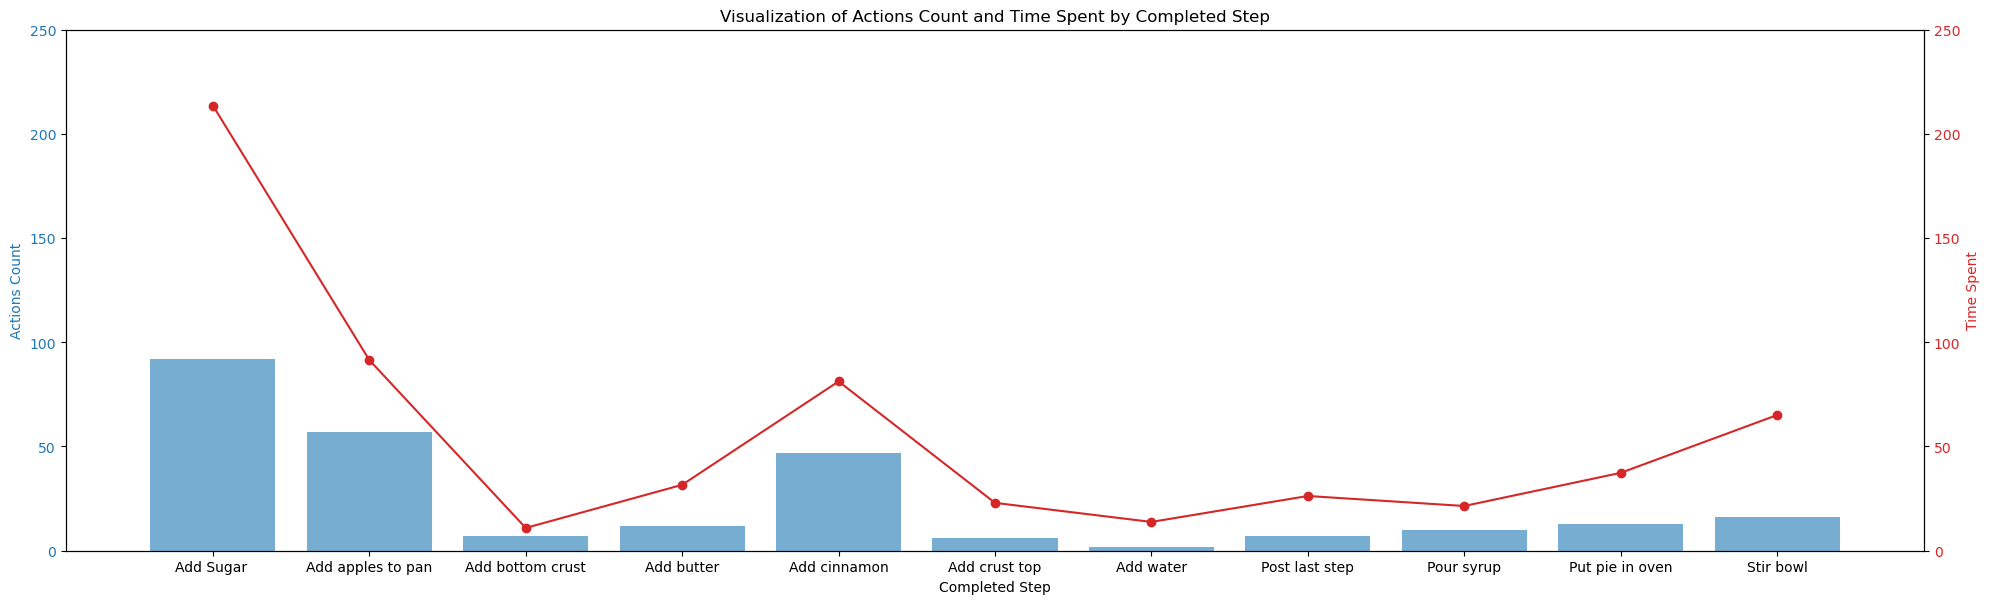

Extracted df_grouped from C026B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C027C_ActionSteps.ipynb


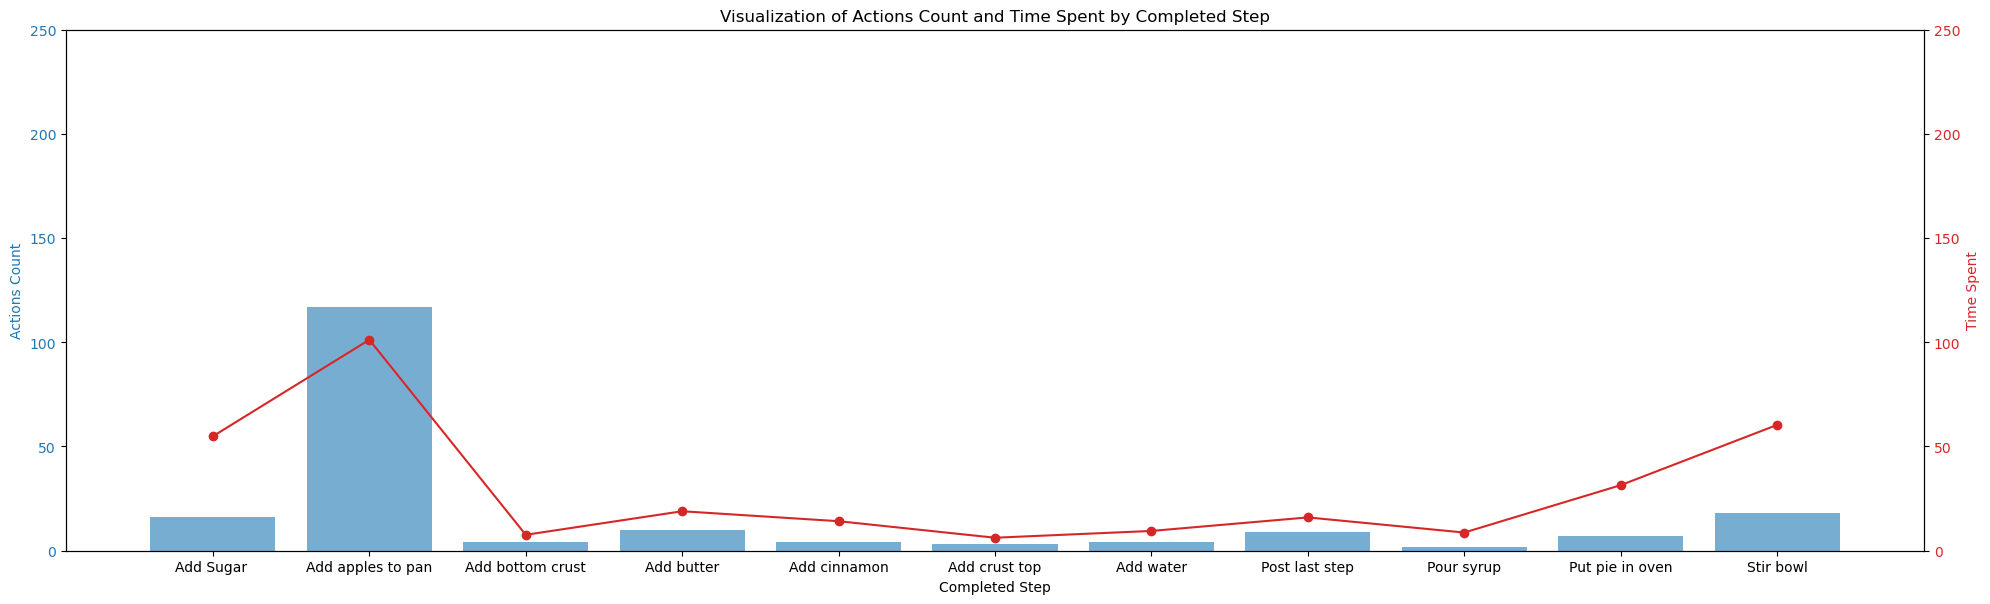

Extracted df_grouped from C027C_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C030B_ActionSteps.ipynb


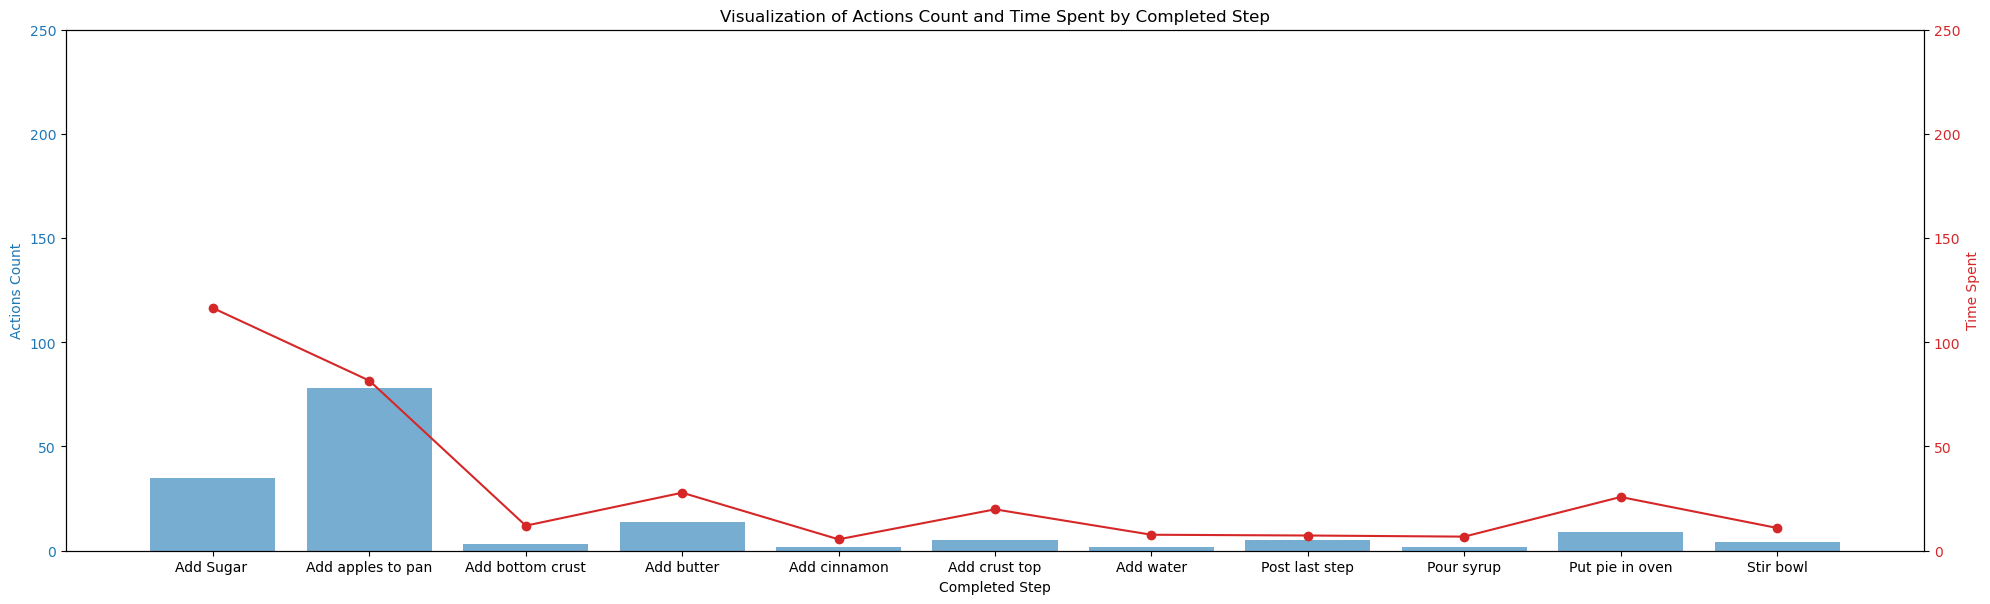

Extracted df_grouped from C030B_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/C031C_ActionSteps.ipynb


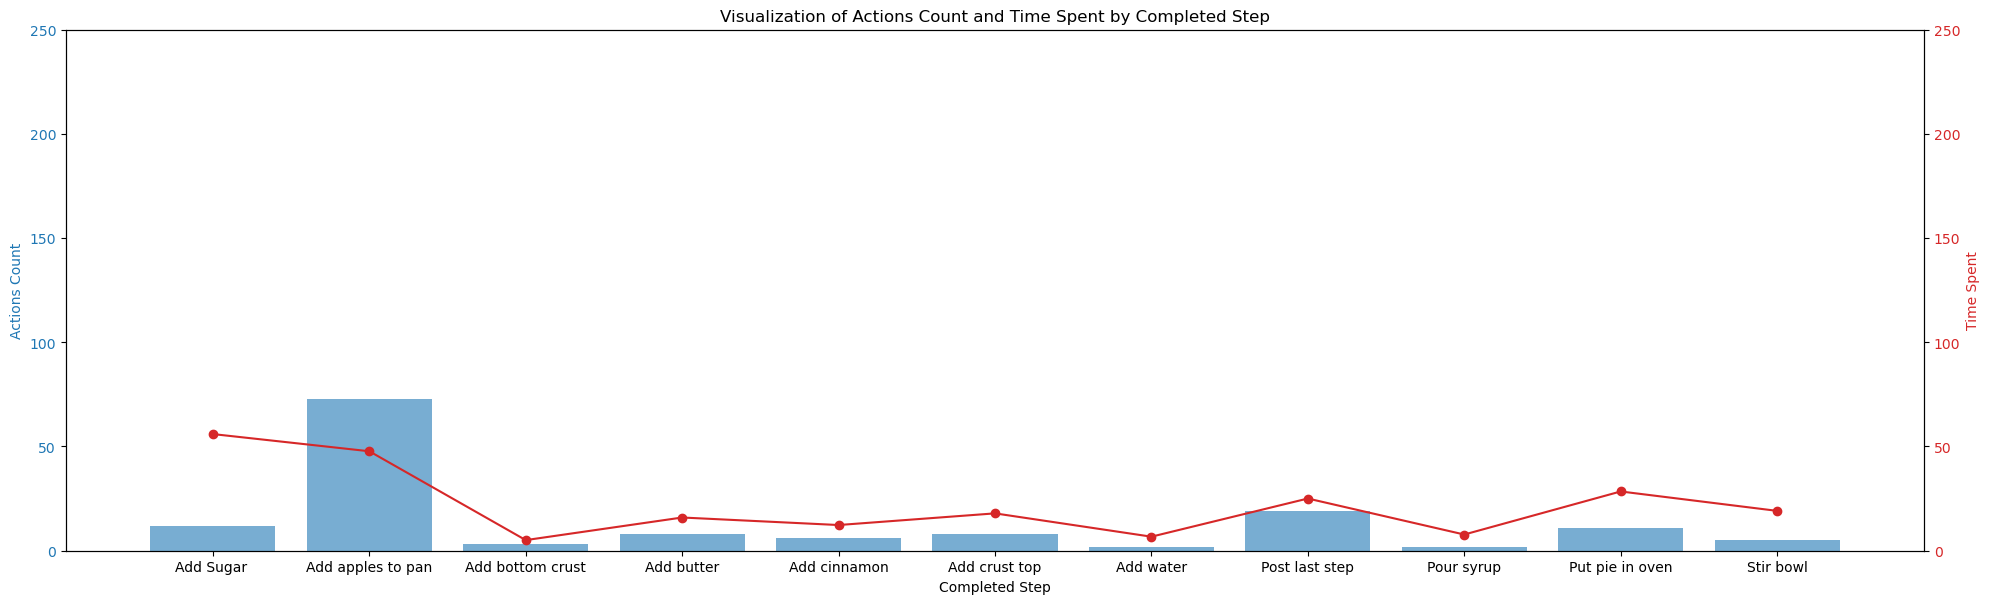

Extracted df_grouped from C031C_ActionSteps.ipynb


In [3]:
import nbformat

# List to store the dataframes
dfs = []

# Function to execute cells and extract totals_df
def extract_totals_df(nb):
    exec_env = {}
    df = None
    # Execute all cells to set up the environment
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, exec_env)
            except Exception as e:
                print(f"Error executing cell: {cell.source}\n{e}")

    # Extract totals_df
    df = exec_env.get('df_grouped')
    return df

# Process each notebook file
for filename in os.listdir(directory):
    if filename.endswith("_ActionSteps.ipynb"):
        filepath = os.path.join(directory, filename)
        print(f"Processing file: {filepath}")
        
        with open(filepath) as f:
            nb = nbformat.read(f, as_version=4)
        
        df = extract_totals_df(nb)
        
        if df is not None:
            print(f"Extracted df_grouped from {filename}")
            dfs.append(df)
        else:
            print(f"No df_grouped found in {filename}")

combined_df = pd.concat(dfs)


#### Extracting Action Counts for Participants according to every completed step

In [4]:
import nbformat
import glob
import matplotlib.pyplot as plt

In [5]:
def extract_dataframe(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
        
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, {}, local_context)
                if 'result_df' in local_context:
                    return local_context['result_df']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

# List to store dataframes from each notebook
dataframes = []

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimplePie/'
file_pattern = directory + '*_ActionSteps.ipynb'

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4]  # Extract the first 4 characters of the filename
    df = extract_dataframe(file_path)
    if df is not None:
        df['Participant'] = participant_id  # Add a new column for Participant ID
        dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Aggregate the data
aggregated_data = combined_df.groupby(['Participant', 'Completed Step']).agg({'Actions Count': 'sum'}).reset_index()

aggregated_data



,Participant,Completed Step,Actions Count
0,C002,Add Sugar,70
1,C002,Add apples to pan,68
2,C002,Add bottom crust,6
3,C002,Add butter,8
4,C002,Add cinnamon,7
...,...,...,...
141,C031,Add water,2
142,C031,Post last step,19
143,C031,Pour syrup,2
144,C031,Put pie in oven,11


In [6]:
pivot_table = aggregated_data.pivot_table(index='Completed Step', columns='Participant', values='Actions Count', fill_value=0)
pivot_table = pivot_table.astype(int)
statistics = pd.DataFrame()
statistics['Mean'] = pivot_table.mean(axis=1)
statistics['Median'] = pivot_table.median(axis=1)
statistics['Standard Deviation'] = pivot_table.std(axis=1)
final_table = pd.concat([pivot_table, statistics], axis=1)
final_table

,C002,C004,C005,C010,C011,C014,C015,C018,C019,C023,C026,C027,C030,C031,Mean,Median,Standard Deviation
Completed Step,,,,,,,,,,,,,,,,,
Add Sugar,70,28,19,22,5,9,8,46,8,16,92,16,35,12,27.571429,17.5,25.692604
Add apples to pan,68,36,85,81,0,127,90,98,48,76,57,117,78,73,73.857143,77.0,32.346340
Add bottom crust,6,3,2,2,0,13,2,20,5,5,7,4,3,3,5.357143,3.5,5.241948
Add butter,8,9,7,2,11,16,7,7,10,8,12,10,14,8,9.214286,8.5,3.423416
Add cinnamon,7,2,52,5,0,8,2,3,29,5,47,4,2,6,12.285714,5.0,17.269041
Add crust top,23,5,3,22,0,4,4,6,21,4,6,3,5,8,8.142857,5.0,7.734609
Add water,22,2,3,8,0,8,6,9,1,4,2,4,2,2,5.214286,3.5,5.590907
Post last step,4,6,13,19,41,52,6,13,11,14,7,9,5,19,15.642857,12.0,14.085492
Pour syrup,4,2,3,7,0,2,2,4,2,8,10,2,2,2,3.571429,2.0,2.820646


In [7]:
pivot_table = aggregated_data.pivot_table(index='Completed Step', columns='Participant', values='Actions Count', fill_value=0)
pivot_table = pivot_table.astype(int)
pivot_table = pivot_table.transpose()
pivot_table['Action Count S.D'] = pivot_table.std(axis=1)
pivot_table

Completed Step,Add Sugar,Add apples to pan,Add bottom crust,Add butter,Add cinnamon,Add crust top,Add water,Post last step,Pour syrup,Put pie in oven,Stir bowl,Action Count S.D
Participant,,,,,,,,,,,,
C002,70,68,6,8,7,23,22,4,4,12,7,24.617067
C004,28,36,3,9,2,5,2,6,2,7,6,11.430422
C005,19,85,2,7,52,3,3,13,3,33,4,26.613052
C010,22,81,2,2,5,22,8,19,7,15,6,22.471396
C011,5,0,0,11,0,0,0,41,0,0,0,12.375930
C014,9,127,13,16,8,4,8,52,2,10,3,37.179173
C015,8,90,2,7,2,4,6,6,2,7,14,25.625626
C018,46,98,20,7,3,6,9,13,4,7,12,28.409025
C019,8,48,5,10,29,21,1,11,2,7,7,14.073831


In [8]:
pivot_table.to_csv('ActionCountVariability_SimplePie.csv')

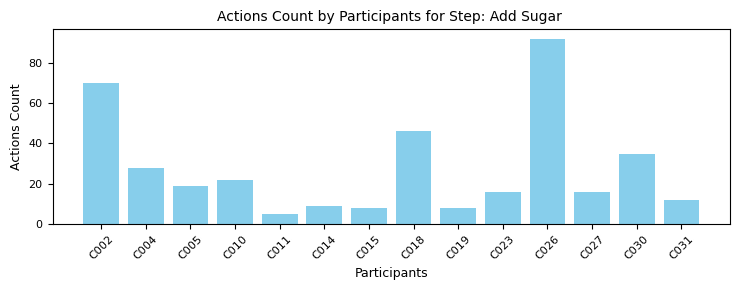

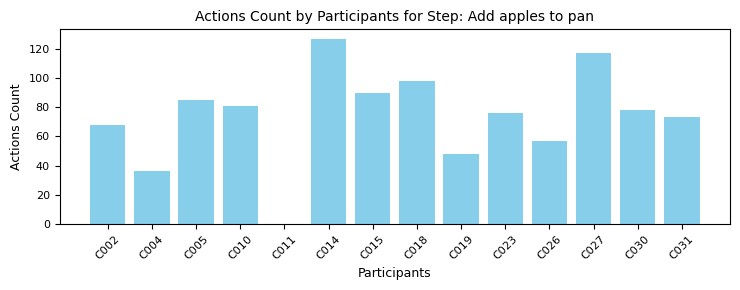

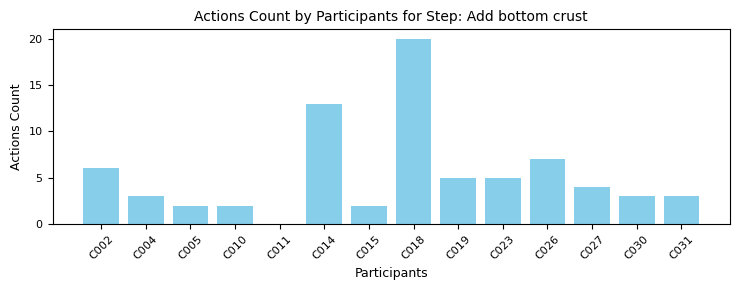

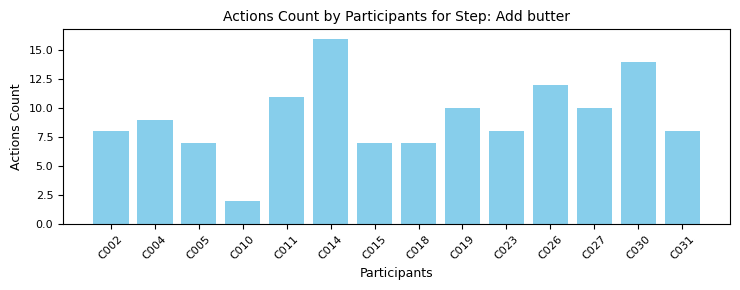

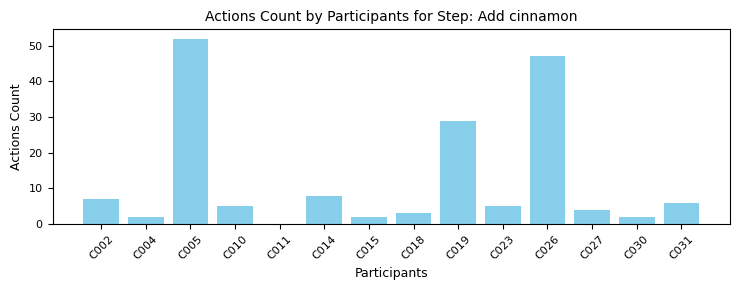

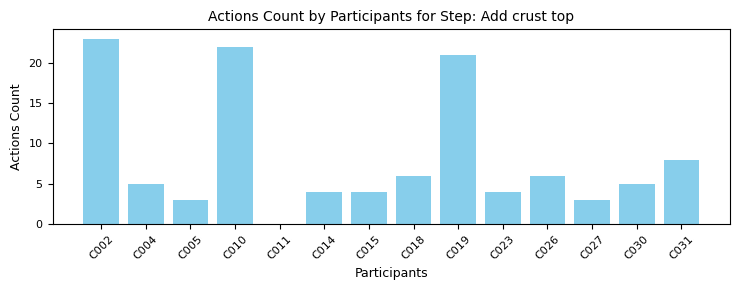

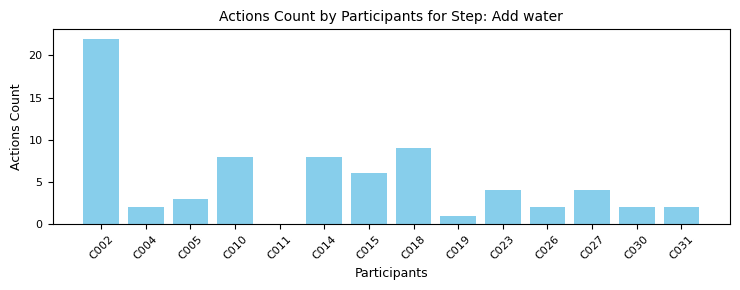

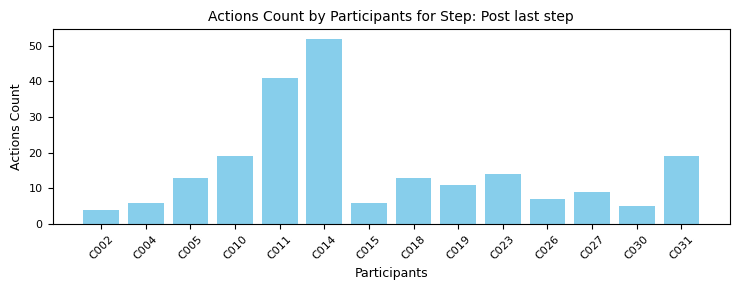

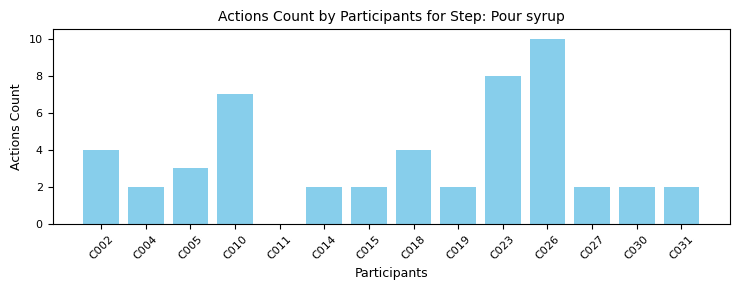

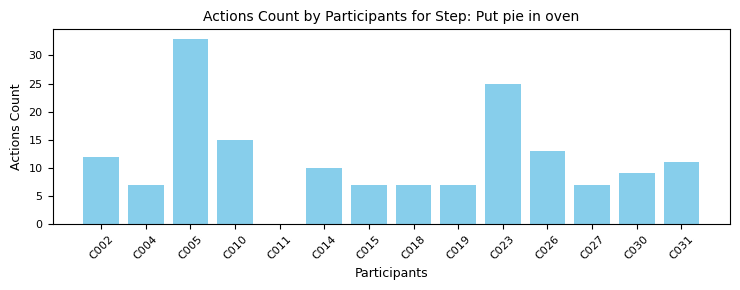

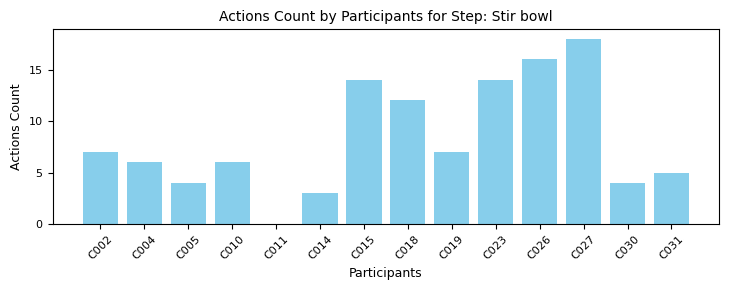

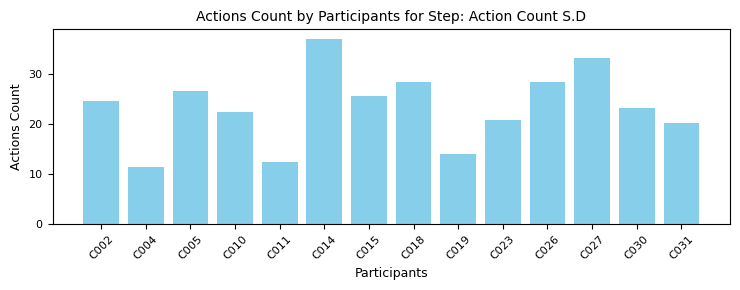

In [9]:
# Define the number of steps
steps = pivot_table.columns

for step in steps:
    plt.figure(figsize=(7.5,3))
    plt.bar(pivot_table.index, pivot_table[step], color='skyblue')
    plt.xlabel('Participants',fontsize=9)
    plt.ylabel('Actions Count',fontsize=9)
    plt.title(f'Actions Count by Participants for Step: {step}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

#### Extracting Action Counts for every participant according to "Action Type"

In [10]:
def extract_features_summary(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                # Check if the cell contains plotting code and skip it
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'features_summary' in local_context:
                    return local_context['features_summary']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

features_summaries = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_features_summary(file_path)
    if df is not None:
        df['Participant'] = participant_id 
        features_summaries.append(df)
    else:
        print(f"No features_summary found in {file_path}")

combined_features_summary = pd.concat(features_summaries, ignore_index=True)
combined_features_summary

,Action Type,Action Count,Total Missed Interactions,Participant
0,Right Hand Grab,97,24.0,C002
1,Right Hand Released,57,0.0,C002
2,Left Hand Grab,40,6.0,C002
3,Left Hand Released,27,0.0,C002
4,Chopped,10,0.0,C002
...,...,...,...,...
62,Left Hand Released,22,0.0,C030
63,Chopped,10,0.0,C030
64,Right Hand Grab,86,28.0,C031
65,Right Hand Released,45,0.0,C031


In [24]:
pivot_table_sum = combined_features_summary.pivot_table(
    index='Action Type',
    columns='Participant',
    values='Action Count',
    aggfunc='sum',
    fill_value=0
)
pivot_table_sum=pivot_table_sum.transpose()
pivot_table_sum

Action Type,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released
Participant,,,,,
C002,10,40,27,97,57
C004,8,38,25,23,12
C005,22,97,61,30,14
C010,14,35,23,74,43
C011,17,3,0,22,15
C014,20,41,30,88,73
C015,21,13,11,61,42
C018,24,69,25,71,36
C019,15,39,33,41,21


In [25]:
pivot_table_sum.to_csv('ActionType_SimplePie.csv')

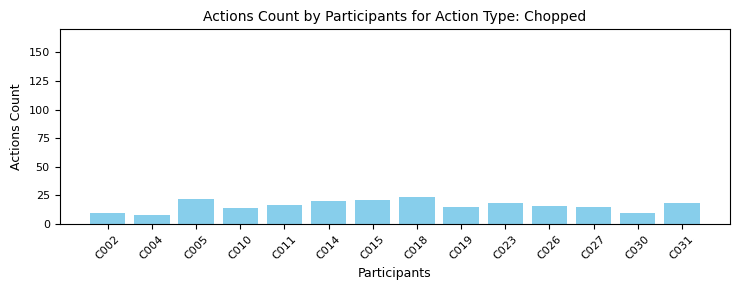

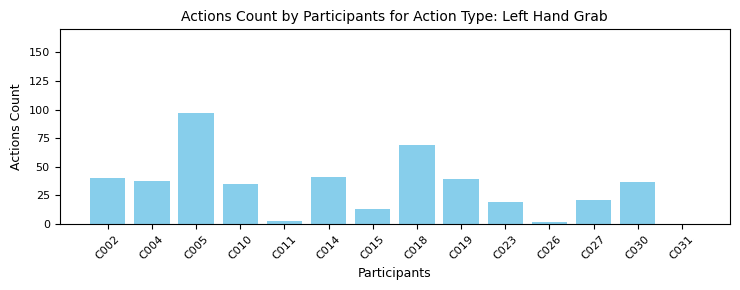

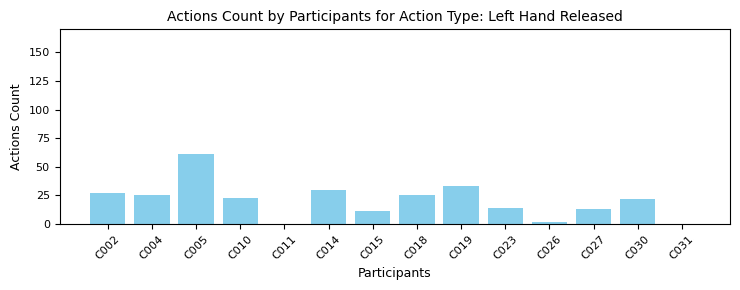

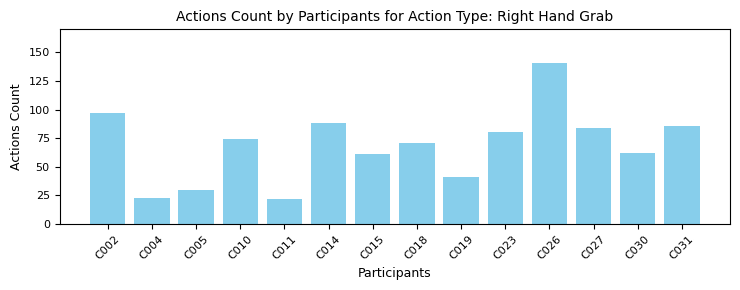

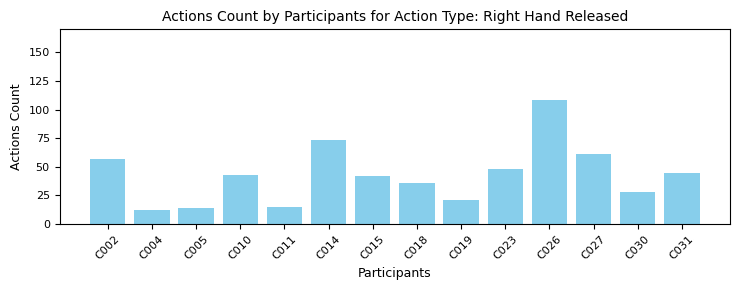

In [12]:
action_types = pivot_table_sum.index

# Create a bar chart for each action type
for action_type in action_types:
    plt.figure(figsize=(7.5,3))
    plt.bar(pivot_table_sum.columns, pivot_table_sum.loc[action_type], color='skyblue')
    plt.xlabel('Participants', fontsize=9)
    plt.ylabel('Actions Count', fontsize=9)
    plt.title(f'Actions Count by Participants for Action Type: {action_type}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.ylim(0, 170)
    plt.tight_layout()
    plt.show()

#### Missed Interactions according to action type

In [26]:
pivot_table_missed= combined_features_summary.pivot_table(
    index='Action Type',
    columns='Participant',
    values='Total Missed Interactions',
    aggfunc='sum',
    fill_value=0
)
pivot_table_missed = pivot_table_missed.astype(int)
pivot_table_missed = pivot_table_missed.transpose()
pivot_table_missed

Action Type,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released
Participant,,,,,
C002,0,6,0,24,0
C004,0,8,0,2,0
C005,0,15,0,9,0
C010,0,8,0,21,0
C011,0,2,0,2,0
C014,0,6,0,6,0
C015,0,0,0,7,0
C018,0,12,0,25,0
C019,0,4,0,10,0


In [27]:
pivot_table_missed.to_csv('ActionTypeMissed_SimplePie.csv')

#### Time spent on every step by participants

In [14]:
def extract_steps_summary(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
        
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                # Check if the cell contains plotting code and skip it
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'steps_summary' in local_context:
                    return local_context['steps_summary']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None


dataframes = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_steps_summary(file_path)
    if df is not None:
        df['Participant'] = participant_id  
        dataframes.append(df)

comb_df = pd.concat(dataframes, ignore_index=True)
summary = comb_df.pivot_table(index='Participant', columns='Completed Step', values='Time Spent', fill_value=0)
summary

Completed Step,Add Sugar,Add apples to pan,Add bottom crust,Add butter,Add cinnamon,Add crust top,Add water,Pour syrup,Put pie in oven,Stir bowl
Participant,,,,,,,,,,
C002,173.379866,75.221955,7.308991,11.199202,12.307739,39.561127,47.492569,13.787475,32.746247,19.482819
C004,104.147800,31.125611,5.545456,16.904571,7.664902,14.874344,4.743866,7.531357,27.038422,20.552735
C005,58.434341,91.763748,5.488465,10.319671,124.043671,6.880005,6.078019,9.275421,66.836518,23.751648
C010,102.529976,81.036821,7.775025,9.692443,10.960815,42.111115,27.160385,15.604706,31.408905,22.089508
C011,17.375539,0.000000,0.000000,10.657751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C014,64.921382,108.763993,27.423675,34.033752,14.052369,8.416168,25.629615,10.375915,24.960450,10.064972
C015,16.443671,61.940643,6.327790,8.678830,5.207191,10.177094,11.475079,9.055191,19.269379,22.575318
C018,207.799388,94.714783,24.234039,13.370682,7.429077,11.315278,14.399826,11.052551,24.077973,29.645142
C019,22.784599,39.908981,5.387726,8.864959,82.730018,26.262710,2.545128,7.076584,21.647736,15.331482


In [15]:
summary['Time Variability'] = summary.std(axis=1)
summary

Completed Step,Add Sugar,Add apples to pan,Add bottom crust,Add butter,Add cinnamon,Add crust top,Add water,Pour syrup,Put pie in oven,Stir bowl,Time Variability
Participant,,,,,,,,,,,
C002,173.379866,75.221955,7.308991,11.199202,12.307739,39.561127,47.492569,13.787475,32.746247,19.482819,50.340261
C004,104.147800,31.125611,5.545456,16.904571,7.664902,14.874344,4.743866,7.531357,27.038422,20.552735,29.587162
C005,58.434341,91.763748,5.488465,10.319671,124.043671,6.880005,6.078019,9.275421,66.836518,23.751648,42.595820
C010,102.529976,81.036821,7.775025,9.692443,10.960815,42.111115,27.160385,15.604706,31.408905,22.089508,32.157613
C011,17.375539,0.000000,0.000000,10.657751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.118374
C014,64.921382,108.763993,27.423675,34.033752,14.052369,8.416168,25.629615,10.375915,24.960450,10.064972,31.466625
C015,16.443671,61.940643,6.327790,8.678830,5.207191,10.177094,11.475079,9.055191,19.269379,22.575318,16.728146
C018,207.799388,94.714783,24.234039,13.370682,7.429077,11.315278,14.399826,11.052551,24.077973,29.645142,62.982422
C019,22.784599,39.908981,5.387726,8.864959,82.730018,26.262710,2.545128,7.076584,21.647736,15.331482,23.819270


In [16]:
#summary.to_csv('TimeVariability_SimplePie.csv')

In [17]:
summary_stepscount = comb_df.pivot_table(index='Participant', columns='Completed Step', values='Count', fill_value=0)
summary_stepscount=summary_stepscount.astype(int)
summary_stepscount['Total Completed Steps']=summary_stepscount.sum(axis=1)
summary_stepscount

Completed Step,Add Sugar,Add apples to pan,Add bottom crust,Add butter,Add cinnamon,Add crust top,Add water,Pour syrup,Put pie in oven,Stir bowl,Total Completed Steps
Participant,,,,,,,,,,,
C002,1,8,1,2,1,1,1,1,1,1,18
C004,1,8,1,2,1,1,1,1,1,1,18
C005,1,8,1,2,1,1,1,1,1,1,18
C010,1,8,1,2,1,1,1,1,1,1,18
C011,1,0,0,2,0,0,0,0,0,0,3
C014,1,16,1,2,1,1,1,1,1,1,26
C015,1,16,1,2,1,1,1,1,1,1,26
C018,1,16,1,2,1,1,1,1,1,1,26
C019,1,8,1,2,1,1,1,1,1,1,18


In [18]:
#summary_stepscount.to_csv('TotalCompletedSteps_ComplexPie.csv')

In [19]:
from collections import defaultdict

def extract_object_interactions(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, {}, local_context)
                if 'object_interactions' in local_context:
                    return local_context['object_interactions']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

def summarize_interactions(interactions):
    summary = defaultdict(int)
    for obj, count in interactions.items():
        base_name = obj.split('_')[0].lower()  # Get the base name and convert to lowercase
        summary[base_name] += count
    return summary

all_interactions_summary = []

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4]
    interactions = extract_object_interactions(file_path)
    if interactions is not None:
        summary = summarize_interactions(interactions)
        summary['Participant'] = participant_id  
        all_interactions_summary.append(summary)
    else:
        print(f"No object_interactions found in {file_path}")


# Combine all summaries into one dataframe
combined_summary = pd.DataFrame(all_interactions_summary)
combined_summary = combined_summary.set_index('Participant').transpose()
combined_summary.columns.name = None

#combined_summary['Mean']=combined_summary.mean(axis=1)
#combined_summary['Median']=combined_summary.median(axis=1)
#combined_summary['Std Dev']=combined_summary.std(axis=1)
#Q1 = combined_summary.quantile(0.25, axis=1)
#Q3 = combined_summary.quantile(0.75, axis=1)
#combined_summary['IQR'] = Q3 - Q1
#combined_summary.loc['Total Interacted Objects'] = combined_summary.sum()

combined_summary = combined_summary.fillna(0).astype(int)
combined_summary

,C002,C004,C005,C010,C011,C014,C015,C018,C019,C023,C026,C027,C030,C031
newmeasuringcupsimple2,38,10,14,4,2,16,2,6,6,14,76,12,2,2
piebowlsimple,28,8,22,30,0,12,16,34,26,24,20,10,16,2
knife,20,4,6,8,4,24,14,2,6,6,18,24,14,12
applepiecookbook,15,9,16,7,5,7,7,34,7,7,7,7,9,9
butter,9,4,4,3,3,2,3,4,4,3,4,3,7,4
waterpitchersimple,8,4,2,2,0,6,4,2,2,4,2,4,2,4
butterholdersimple,6,2,10,2,4,8,2,2,2,2,2,4,2,2
stirspoonpiesimple,6,2,40,12,0,16,6,4,4,6,8,14,2,2
apple,44,28,54,66,27,70,69,70,57,58,69,83,42,62
pillsberrydoughboysimple,5,1,1,2,0,1,1,3,2,1,1,1,1,2


In [20]:
#combined_summary.to_csv('Interacted_objects_SimplePie.csv')

In [21]:
import pandas as pd
import glob
import os

# Function to extract the features summary from each notebook
def extract_interacted_df(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
    
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                if 'plt.show()' in cell.source or 'plt.plot' in cell.source or 'plt.bar' in cell.source:
                    continue
                exec(cell.source, {}, local_context)
                if 'interactions_df' in local_context:
                    interactions_df = local_context['interactions_df']
                    interactions_df.index.name = 'Completed Step'
                    interactions_df = interactions_df.reset_index()
                    return interactions_df
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

# Extract data from each notebook
features_intobjects = []
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4] 
    df = extract_interacted_df(file_path)
    if df is not None:
        df['Participant'] = participant_id  # Add participant ID to the DataFrame
        features_intobjects.append(df)
    else:
        print(f"No interactions_df found in {file_path}")

# Combine all participants' data into one DataFrame
combined_intobjects = pd.concat(features_intobjects, ignore_index=True)
combined_intobjects = combined_intobjects.set_index('Participant').reset_index()
combined_intobjects


,Participant,Completed Step,Apple,ApplePieCookbook,Butter,ButterHolderSimple,CinnyShakerGrabable,Knife,NewMeasuringCupSimple2,PieBowlSimple,PiePanSimple,PillsberryDoughBoySimple,PillsberryDoughGirlSimple,SaucePotSimple2,StirSpoonPieSImple,SugarJarSimple,WaterPitcherSimple,oven,Interacted Objects
0,C002,Add Sugar,2.0,2,4,6,0.0,2.0,35,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,55
1,C002,Add water,0.0,8,2,0,0.0,0.0,1,0.0,0.0,0.0,0.0,2.0,0.0,0,7.0,0.0,20
2,C002,Add crust top,0.0,1,0,0,2.0,2.0,2,8.0,0.0,5.0,0.0,0.0,0.0,0,0.0,0.0,20
3,C002,Add butter,0.0,0,3,0,0.0,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,8
4,C002,Add cinnamon,0.0,1,0,0,1.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,C031,Add water,0.0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,2
128,C031,Add butter,0.0,0,4,2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,7
129,C031,Add apples to pan,62.0,0,0,0,0.0,8.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,70
130,C031,Pour syrup,0.0,0,0,0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,2


In [22]:
#combined_intobjects.to_csv('InteractedObjects_PerStep.csv')